<a href="https://colab.research.google.com/github/pepemesquita/Dogs_Nose_Detection/blob/main/Doguinhos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Presets

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


#Installing YOLO

In [ ]:
!pip install ultralytics --quiet
from ultralytics import YOLO
from IPython import display
display.clear_output()
!yolo mode=checks

Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/cfg/__init__.py", line 393, in entrypoint
    raise ValueError(f"Invalid 'mode={mode}'. Valid modes are {MODES}.\n{CLI_HELP_MSG}")
ValueError: Invalid 'mode=<module 'ultralytics.utils.checks' from '/usr/local/lib/python3.10/dist-packages/ultralytics/utils/checks.py'>'. Valid modes are ('train', 'val', 'predict', 'export', 'track', 'benchmark').

    Arguments received: ['yolo', 'mode=checks']. Ultralytics 'yolo' commands use the following syntax:

        yolo TASK MODE ARGS

        Where   TASK (optional) is one of ('detect', 'segment', 'classify', 'pose')
                MODE (required) is one of ('train', 'val', 'predict', 'export', 'track', 'benchmark')
                ARGS (optional) are any number of custom 'arg=value' pairs like 'imgsz=320' that override defaults.
                    See all ARGS at https://d

%cd {HOME}
!pip install roboflow --quiet

from roboflow import Roboflow

rf = Roboflow(api_key="E9W74UAjkzu80gP7a8q4")

project = rf.workspace("school-2bcb4").project("dog-nose-0geek")
dataset = project.version(1).download("yolov8")

project.version(dataset.version).deploy(model_type="yolov8", model_path=f"{HOME}/runs/detect/train/")

In [ ]:
import roboflow


from roboflow import Roboflow
rf = Roboflow(api_key="")
project = rf.workspace("school-2bcb4").project("dog-nose-0geek")
version = project.version(1)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.2.54, to fix: `pip install ultralytics==8.0.196`


In [ ]:
model = YOLO('yolov8n.pt')  # load a pretrained model (recommended for training)

# Train the model
results = model.train(data='/content/dog-nose-1/data.yaml', epochs=85)

Ultralytics YOLOv8.2.54 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/dog-nose-1/data.yaml, epochs=85, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train9, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, s

100%|██████████| 755k/755k [00:00<00:00, 24.9MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)


AMP: checks passed ✅


train: Scanning /content/dog-nose-1/train/labels... 1500 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1500/1500 [00:00<00:00, 2143.92it/s]


train: New cache created: /content/dog-nose-1/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
val: Scanning /content/dog-nose-1/valid/labels... 140 images, 0 backgrounds, 0 corrupt: 100%|██████████| 140/140 [00:00<00:00, 1623.60it/s]


val: New cache created: /content/dog-nose-1/valid/labels.cache
Plotting labels to runs/detect/train9/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train9
Starting training for 85 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/85      2.39G       1.99      3.455      1.797         19        640: 100%|██████████| 94/94 [00:38<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.23it/s]

                   all        140        143      0.567      0.294      0.323       0.14



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/85      2.25G      1.849      2.521      1.644         18        640: 100%|██████████| 94/94 [00:35<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.62it/s]

                   all        140        143      0.439      0.427      0.394      0.184



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/85      2.25G      1.841      2.137      1.643         24        640: 100%|██████████| 94/94 [00:39<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.28it/s]


                   all        140        143      0.379      0.392      0.339       0.15

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/85      2.25G      1.865       1.98      1.675         13        640: 100%|██████████| 94/94 [00:33<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.45it/s]

                   all        140        143      0.674      0.427      0.519       0.25



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/85      2.25G      1.797      1.854      1.606         20        640: 100%|██████████| 94/94 [00:34<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.23it/s]

                   all        140        143      0.738       0.51      0.642       0.32



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/85      2.25G      1.767       1.76      1.577         13        640: 100%|██████████| 94/94 [00:33<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.97it/s]


                   all        140        143      0.616       0.58      0.591      0.261

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/85      2.25G       1.73      1.662      1.564         17        640: 100%|██████████| 94/94 [00:38<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.82it/s]

                   all        140        143      0.832      0.625      0.748      0.371



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/85      2.25G      1.727      1.602      1.574         20        640: 100%|██████████| 94/94 [00:39<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.43it/s]

                   all        140        143      0.841      0.587      0.706      0.386



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/85      2.25G      1.666      1.508      1.526         19        640: 100%|██████████| 94/94 [00:41<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.64it/s]

                   all        140        143      0.809      0.671      0.736      0.361



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/85      2.25G      1.669      1.502      1.513         23        640: 100%|██████████| 94/94 [00:33<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.46it/s]

                   all        140        143      0.803      0.657      0.746      0.383



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/85      2.25G      1.619      1.454      1.483         22        640: 100%|██████████| 94/94 [00:34<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.14it/s]


                   all        140        143        0.8      0.615       0.73      0.408

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/85      2.25G      1.632      1.402      1.488         19        640: 100%|██████████| 94/94 [00:35<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.04it/s]

                   all        140        143      0.793       0.65       0.76        0.4



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/85      2.25G      1.613      1.365      1.504         17        640: 100%|██████████| 94/94 [00:39<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.53it/s]

                   all        140        143       0.88       0.72       0.82      0.446



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/85      2.25G      1.601      1.334      1.487         16        640: 100%|██████████| 94/94 [00:35<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.86it/s]

                   all        140        143      0.844      0.679      0.781      0.394



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/85      2.25G      1.561       1.28      1.448         20        640: 100%|██████████| 94/94 [00:31<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.80it/s]

                   all        140        143      0.879      0.664      0.767      0.404



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/85      2.25G      1.571      1.265      1.459         24        640: 100%|██████████| 94/94 [00:30<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.17it/s]

                   all        140        143      0.867      0.734      0.817      0.441



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/85      2.25G      1.565      1.225      1.445         24        640: 100%|██████████| 94/94 [00:33<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.14it/s]

                   all        140        143       0.86      0.762      0.831      0.398



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/85      2.25G      1.521      1.203      1.409         24        640: 100%|██████████| 94/94 [00:38<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.81it/s]

                   all        140        143      0.883      0.755      0.821      0.454



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/85      2.25G      1.524      1.177       1.43         17        640: 100%|██████████| 94/94 [00:35<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.04it/s]

                   all        140        143      0.855      0.657      0.767      0.408



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/85      2.25G      1.527      1.172      1.435         20        640: 100%|██████████| 94/94 [00:34<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.27it/s]

                   all        140        143      0.823      0.717      0.784      0.403



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/85      2.25G       1.51      1.117      1.395         13        640: 100%|██████████| 94/94 [00:33<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.70it/s]

                   all        140        143      0.886      0.678      0.781      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/85      2.25G      1.489      1.119      1.403         23        640: 100%|██████████| 94/94 [00:31<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.76it/s]

                   all        140        143      0.837      0.791       0.85      0.457



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/85      2.25G       1.51      1.096      1.404         14        640: 100%|██████████| 94/94 [00:35<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.97it/s]

                   all        140        143      0.835      0.755      0.842      0.437



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/85      2.25G      1.435       1.05       1.35         19        640: 100%|██████████| 94/94 [00:35<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.15it/s]

                   all        140        143      0.937      0.725      0.829      0.433



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/85      2.25G      1.452      1.052      1.372         14        640: 100%|██████████| 94/94 [00:34<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.61it/s]

                   all        140        143      0.953      0.702      0.813      0.451



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/85      2.25G      1.446      1.028      1.368         24        640: 100%|██████████| 94/94 [00:31<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.56it/s]

                   all        140        143      0.871      0.709      0.808       0.44



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/85      2.25G      1.428     0.9981      1.357         19        640: 100%|██████████| 94/94 [00:36<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.84it/s]

                   all        140        143      0.912       0.79      0.876      0.491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/85      2.25G      1.406      1.005      1.359         29        640: 100%|██████████| 94/94 [00:31<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.99it/s]

                   all        140        143      0.906      0.706      0.838      0.446



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/85      2.25G      1.406     0.9944      1.349         24        640: 100%|██████████| 94/94 [00:33<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.27it/s]

                   all        140        143       0.96       0.65      0.807      0.446



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/85      2.25G      1.364     0.9535      1.309         19        640: 100%|██████████| 94/94 [00:34<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.34it/s]

                   all        140        143      0.945      0.769      0.865      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/85      2.25G      1.382      0.954      1.324         22        640: 100%|██████████| 94/94 [00:33<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.36it/s]

                   all        140        143      0.855      0.748      0.825      0.441



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/85      2.25G      1.397     0.9601      1.327         18        640: 100%|██████████| 94/94 [00:37<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.90it/s]

                   all        140        143      0.923      0.762       0.86      0.478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/85      2.25G      1.382     0.9197      1.322         15        640: 100%|██████████| 94/94 [00:31<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.62it/s]

                   all        140        143      0.932      0.734      0.851      0.462



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/85      2.25G      1.313     0.8851      1.299         16        640: 100%|██████████| 94/94 [00:31<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.77it/s]

                   all        140        143      0.858      0.741      0.814      0.446



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/85      2.25G      1.324     0.8832       1.28         13        640: 100%|██████████| 94/94 [00:35<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.33it/s]

                   all        140        143      0.898      0.776      0.862      0.476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/85      2.25G      1.387     0.9314      1.336         20        640: 100%|██████████| 94/94 [00:38<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.84it/s]

                   all        140        143      0.825      0.797      0.844      0.458



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/85      2.25G      1.293     0.8516      1.285         17        640: 100%|██████████| 94/94 [00:33<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.74it/s]

                   all        140        143      0.852      0.699      0.801      0.446



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/85      2.25G      1.327     0.8676      1.299         11        640: 100%|██████████| 94/94 [00:31<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.93it/s]

                   all        140        143      0.884      0.713      0.841      0.464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/85      2.25G      1.312     0.8728      1.279         24        640: 100%|██████████| 94/94 [00:32<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.80it/s]

                   all        140        143      0.929      0.823      0.881      0.466



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/85      2.25G      1.265     0.8087      1.255         16        640: 100%|██████████| 94/94 [00:35<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.16it/s]

                   all        140        143      0.957      0.776      0.876      0.488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/85      2.25G      1.258     0.8107       1.25         27        640: 100%|██████████| 94/94 [00:38<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.39it/s]

                   all        140        143      0.888      0.776      0.857      0.485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/85      2.25G      1.248      0.775       1.24         31        640: 100%|██████████| 94/94 [00:33<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.74it/s]

                   all        140        143      0.912      0.797      0.871      0.471



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/85      2.25G      1.256     0.8113      1.249         18        640: 100%|██████████| 94/94 [00:31<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.10it/s]

                   all        140        143       0.89      0.789      0.858      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/85      2.25G      1.259     0.8006      1.257         18        640: 100%|██████████| 94/94 [00:33<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.15it/s]

                   all        140        143      0.906      0.804      0.872      0.494



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/85      2.25G      1.239      0.779      1.234         17        640: 100%|██████████| 94/94 [00:37<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.12it/s]

                   all        140        143      0.949      0.782      0.876      0.491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/85      2.26G      1.224     0.7477       1.23         25        640: 100%|██████████| 94/94 [00:33<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.27it/s]

                   all        140        143      0.871       0.72      0.817      0.437



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/85      2.25G      1.238     0.7685      1.247         18        640: 100%|██████████| 94/94 [00:33<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.59it/s]

                   all        140        143      0.932      0.768      0.862      0.471



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/85      2.25G      1.221     0.7522      1.225         15        640: 100%|██████████| 94/94 [00:31<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.03it/s]

                   all        140        143      0.938      0.769      0.873      0.463



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/85      2.25G      1.194     0.7467      1.221         14        640: 100%|██████████| 94/94 [00:32<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.00it/s]

                   all        140        143      0.884      0.804      0.864      0.476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/85      2.25G      1.197     0.7283       1.22         19        640: 100%|██████████| 94/94 [00:39<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.29it/s]

                   all        140        143      0.926      0.818      0.903      0.501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      51/85      2.25G      1.176      0.718      1.216         12        640: 100%|██████████| 94/94 [00:35<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.56it/s]

                   all        140        143      0.871      0.832      0.884      0.501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      52/85      2.25G      1.154     0.7068      1.201         17        640: 100%|██████████| 94/94 [00:35<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.26it/s]

                   all        140        143      0.908      0.783      0.869      0.482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      53/85      2.25G      1.159     0.7038      1.196         22        640: 100%|██████████| 94/94 [00:34<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.64it/s]

                   all        140        143      0.939      0.741      0.877      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      54/85      2.25G      1.151     0.6969      1.196         18        640: 100%|██████████| 94/94 [00:38<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.66it/s]

                   all        140        143      0.963      0.748      0.859      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      55/85      2.25G      1.144      0.702      1.193         15        640: 100%|██████████| 94/94 [00:32<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.70it/s]

                   all        140        143      0.927      0.802      0.888      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      56/85      2.25G      1.115     0.6892      1.181         11        640: 100%|██████████| 94/94 [00:31<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.35it/s]

                   all        140        143      0.917      0.774      0.868      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      57/85      2.25G      1.124      0.671      1.171         24        640: 100%|██████████| 94/94 [00:34<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.28it/s]

                   all        140        143       0.92      0.755      0.847      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      58/85      2.25G      1.123     0.6704      1.175         24        640: 100%|██████████| 94/94 [00:35<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.20it/s]

                   all        140        143      0.877      0.798      0.869      0.503



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      59/85      2.25G      1.102     0.6599      1.159         22        640: 100%|██████████| 94/94 [00:38<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.29it/s]

                   all        140        143      0.878      0.776      0.863      0.472



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      60/85      2.25G      1.078     0.6494      1.144         29        640: 100%|██████████| 94/94 [00:34<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.71it/s]

                   all        140        143      0.963      0.783      0.883      0.488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      61/85      2.25G      1.072     0.6443      1.146         19        640: 100%|██████████| 94/94 [00:32<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.02it/s]

                   all        140        143      0.939      0.757      0.867      0.483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      62/85      2.25G      1.083     0.6461      1.152         25        640: 100%|██████████| 94/94 [00:32<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.88it/s]

                   all        140        143      0.942      0.792       0.88       0.51



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      63/85      2.25G      1.061     0.6355      1.142         17        640: 100%|██████████| 94/94 [00:38<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.49it/s]

                   all        140        143      0.902      0.783      0.872      0.493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      64/85      2.25G      1.047     0.6195      1.134         18        640: 100%|██████████| 94/94 [00:34<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.20it/s]

                   all        140        143      0.921      0.797       0.88       0.49



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      65/85      2.25G      1.056     0.6154      1.136         15        640: 100%|██████████| 94/94 [00:35<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.21it/s]

                   all        140        143      0.957      0.779      0.874      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      66/85      2.25G      1.051     0.6225      1.128         19        640: 100%|██████████| 94/94 [00:34<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.79it/s]

                   all        140        143      0.942      0.818      0.887      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      67/85      2.25G      1.014     0.6018      1.122         20        640: 100%|██████████| 94/94 [00:39<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.10it/s]


                   all        140        143      0.955       0.79      0.896      0.515

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      68/85      2.25G      1.014     0.6118       1.11         20        640: 100%|██████████| 94/94 [00:31<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.81it/s]

                   all        140        143       0.91      0.818      0.874      0.498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      69/85      2.25G     0.9799      0.573      1.093         16        640: 100%|██████████| 94/94 [00:31<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.23it/s]

                   all        140        143      0.951      0.815      0.893      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      70/85      2.25G      1.012     0.6065      1.105         20        640: 100%|██████████| 94/94 [00:34<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.21it/s]

                   all        140        143      0.931      0.804      0.875      0.506



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      71/85      2.25G     0.9921     0.5886      1.097         23        640: 100%|██████████| 94/94 [00:35<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.23it/s]

                   all        140        143      0.904      0.846       0.89      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      72/85      2.25G     0.9828     0.5704      1.087         18        640: 100%|██████████| 94/94 [00:37<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.90it/s]

                   all        140        143      0.944      0.783      0.859      0.501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      73/85      2.25G       0.95      0.568      1.079         26        640: 100%|██████████| 94/94 [00:34<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.08it/s]

                   all        140        143      0.931      0.769       0.87      0.495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      74/85      2.25G     0.9582     0.5716      1.081         16        640: 100%|██████████| 94/94 [00:31<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.74it/s]

                   all        140        143      0.957       0.78      0.883      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      75/85      2.25G     0.9651     0.5738       1.09         21        640: 100%|██████████| 94/94 [00:30<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.05it/s]

                   all        140        143      0.915      0.818      0.877      0.512


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      76/85      2.38G     0.9443     0.4902      1.074         13        640: 100%|██████████| 94/94 [00:37<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.96it/s]


                   all        140        143      0.919      0.797      0.873      0.483

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      77/85      2.25G     0.9045     0.4615      1.051         13        640: 100%|██████████| 94/94 [00:32<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.62it/s]

                   all        140        143      0.958      0.811      0.887        0.5



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      78/85      2.25G     0.8681     0.4399      1.036         12        640: 100%|██████████| 94/94 [00:33<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.30it/s]

                   all        140        143      0.895      0.834      0.876      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      79/85      2.25G     0.8503      0.435      1.031         12        640: 100%|██████████| 94/94 [00:31<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.78it/s]

                   all        140        143      0.957      0.787      0.879      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      80/85      2.25G     0.8417     0.4344       1.02         11        640: 100%|██████████| 94/94 [00:34<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.99it/s]

                   all        140        143      0.955       0.79      0.871      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      81/85      2.25G     0.8072     0.4218      1.018         12        640: 100%|██████████| 94/94 [00:31<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.08it/s]

                   all        140        143      0.957      0.781      0.875      0.506



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      82/85      2.25G     0.8151     0.4337      1.019         12        640: 100%|██████████| 94/94 [00:33<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.31it/s]

                   all        140        143      0.928      0.832      0.879      0.506



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      83/85      2.25G     0.8001     0.4191      1.001         13        640: 100%|██████████| 94/94 [00:32<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.09it/s]

                   all        140        143      0.907      0.819       0.86      0.495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      84/85      2.25G     0.7996     0.4183      1.004         15        640: 100%|██████████| 94/94 [00:30<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.81it/s]

                   all        140        143       0.93      0.831      0.882        0.5



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      85/85      2.25G     0.8072     0.4202      1.016         13        640: 100%|██████████| 94/94 [00:35<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.59it/s]

                   all        140        143      0.942       0.79      0.872        0.5



85 epochs completed in 0.895 hours.
Optimizer stripped from runs/detect/train9/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/train9/weights/best.pt, 6.3MB

Validating runs/detect/train9/weights/best.pt...
Ultralytics YOLOv8.2.54 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.02it/s]


                   all        140        143      0.956      0.818      0.901      0.518
Speed: 0.8ms preprocess, 3.3ms inference, 0.0ms loss, 5.6ms postprocess per image
Results saved to runs/detect/train9


In [ ]:
model = YOLO('/content/runs/detect/train9/weights/best.pt')
metrics = model.val()

!pip install supervision

Ultralytics YOLOv8.2.54 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/dog-nose-1/valid/labels.cache... 140 images, 0 backgrounds, 0 corrupt: 100%|██████████| 140/140 [00:00<?, ?it/s]
os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.10it/s]


                   all        140        143      0.951      0.815      0.893      0.517
Speed: 0.6ms preprocess, 8.3ms inference, 0.0ms loss, 4.7ms postprocess per image
Results saved to runs/detect/val



image 1/1 /content/dog.jpeg: 640x384 1 0 0.59296875 0.43046875 0.06953125 0.07734375, 95.4ms
Speed: 2.0ms preprocess, 95.4ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 384)


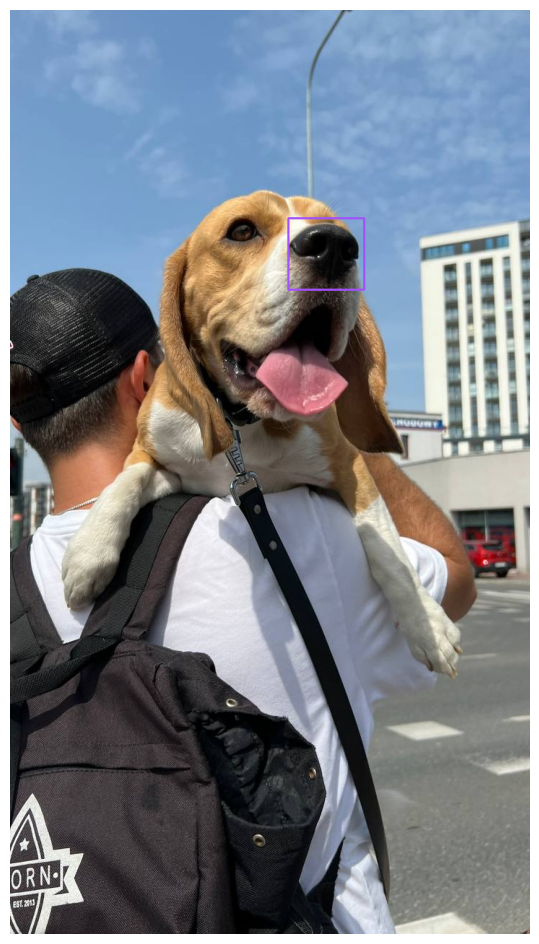

In [ ]:
image = 'dog.jpeg'
results = model.predict(image)

import supervision as sv
import cv2

detections = sv.Detections.from_ultralytics(results[0])

image = cv2.imread(image)

bounding_box_annotator = sv.BoundingBoxAnnotator()

classes = model.names

annotated_image = bounding_box_annotator.annotate(
    scene=image, detections=detections)

sv.plot_image(annotated_image)

In [ ]:
%cd /content
import locale
locale.getpreferredencoding = lambda: "UTF-8"
!zip -r /content/runs.zip /content/runs


/content
  adding: content/runs/ (stored 0%)
  adding: content/runs/detect/ (stored 0%)
  adding: content/runs/detect/predict/ (stored 0%)
  adding: content/runs/detect/predict/dog.jpeg (deflated 6%)
  adding: content/runs/detect/train3/ (stored 0%)
  adding: content/runs/detect/train3/weights/ (stored 0%)
  adding: content/runs/detect/train3/args.yaml (deflated 51%)
  adding: content/runs/detect/train9/ (stored 0%)
  adding: content/runs/detect/train9/val_batch0_pred.jpg (deflated 6%)
  adding: content/runs/detect/train9/PR_curve.png (deflated 22%)
  adding: content/runs/detect/train9/labels.jpg (deflated 32%)
  adding: content/runs/detect/train9/train_batch7050.jpg (deflated 7%)
  adding: content/runs/detect/train9/F1_curve.png (deflated 18%)
  adding: content/runs/detect/train9/results.csv (deflated 85%)
  adding: content/runs/detect/train9/confusion_matrix.png (deflated 29%)
  adding: content/runs/detect/train9/weights/ (stored 0%)
  adding: content/runs/detect/train9/weights/last.